In [50]:
import json
import pandas as pd
import seaborn as sns


def load_file(filename):
    data = []
    with open(filename) as f:
        for line in f.readlines():
            d = json.loads(line)

            # drop all the metadata and the raw sample values
            record = {
                **d['relays'],
                **d['data'],
            }

            # flip the sign of the caps value if the z value is 1
            if record['z'] == 1:
                record['caps'] *= -1

            record.pop('z')

            record['sum'] = record['t_v_mag'] + record['t_c_mag']
            record['diff'] = abs(record['t_v_mag'] - record['t_c_mag'])

            # if record['t_sign'] == 1:
            #     record['t_phase'] *= -1

            # record.pop('t_sign')

            data.append(record)

    df = pd.DataFrame.from_records(data)

    df.drop(
        columns=[
            'm_fwd',
            'm_rev',
            'm_freq',
            'm_temp',
            't_freq',
            # "t_v_mag",
            # "t_c_mag",
            # "t_phase",
            # "t_sign",
        ],
        inplace=True,
    )

    return df

In [51]:
df = load_file('ant3_14mhz.jsonl')

df.sort_values(by='m_swr')


,caps,inds,m_swr,t_v_mag,t_c_mag,t_phase,t_sign,sum,diff
202,12,10,1.008349,2137.000000,2262.000000,647.666667,0.0,4399.000000,125.000000
203,12,11,1.062797,2135.666667,2266.000000,196.333333,0.0,4401.666667,130.333333
187,11,11,1.102086,2153.333333,2244.666667,611.000000,0.0,4398.000000,91.333333
188,11,12,1.139850,2158.000000,2237.666667,368.000000,0.0,4395.666667,79.666667
218,13,10,1.162283,2128.000000,2273.000000,482.333333,0.0,4401.000000,145.000000
...,...,...,...,...,...,...,...,...,...
12,0,12,7.656142,2121.333333,1898.333333,1302.333333,1.0,4019.666667,223.000000
13,0,13,7.916459,2120.000000,1890.666667,1338.000000,1.0,4010.666667,229.333333
14,0,14,8.291578,2119.666667,1890.666667,1345.000000,1.0,4010.333333,229.000000
15,0,15,8.422249,2118.666667,1880.666667,1431.666667,1.0,3999.333333,238.000000


<Axes: xlabel='inds', ylabel='caps'>

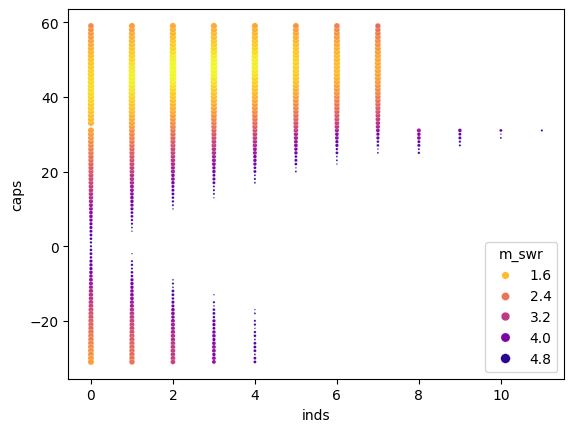

In [67]:
df = load_file('ant3_10mhz.jsonl')
df = df.query('m_swr < 5')

sns.scatterplot(df, x='inds', y='caps', hue='m_swr', palette='plasma_r')


<Axes: xlabel='diff', ylabel='t_phase'>

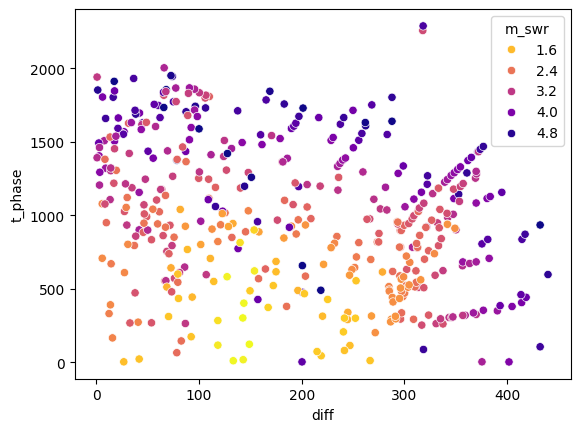

In [76]:
df = load_file('ant2_14mhz.jsonl')
df = df.query('m_swr < 5')

sns.scatterplot(df, x='diff', y='t_phase', hue='m_swr', palette='plasma_r')


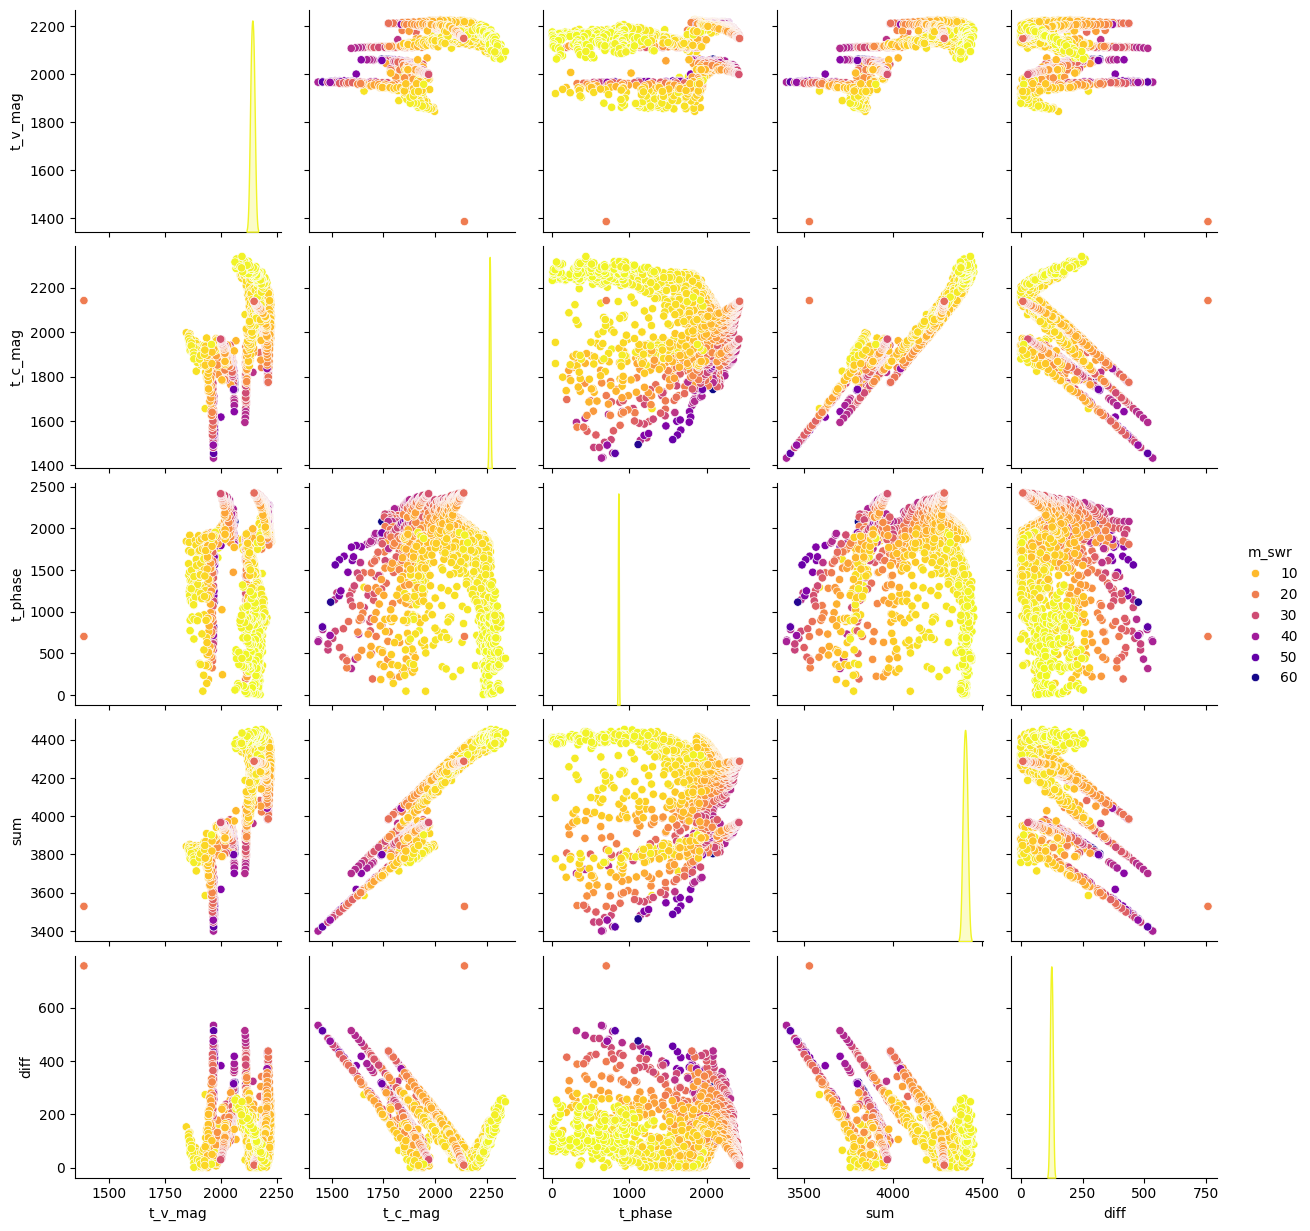

In [69]:
df = load_file('ant3_10mhz.jsonl')
# df = df.query("m_swr < 5")
df.drop(
    columns=[
        'caps',
        'inds',
        't_sign',
    ],
    inplace=True,
)

# sns.pairplot(df, hue='m_swr', plot_kws={'data': df, 'alpha':0.5, 'size': 'm_swr', 'sizes': (25, 1)}, palette='plasma_r')
sns.pairplot(df, hue='m_swr', palette='plasma_r')


<Axes: >

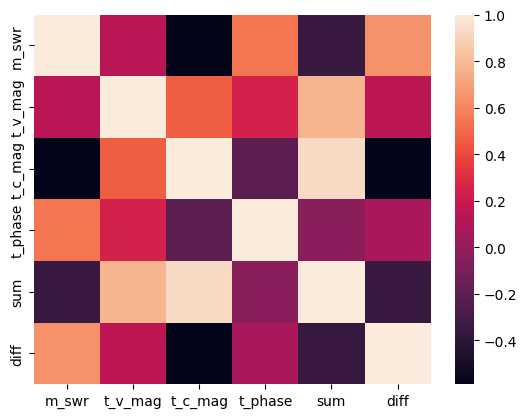

In [58]:
sns.heatmap(df.corr())

<Axes: >

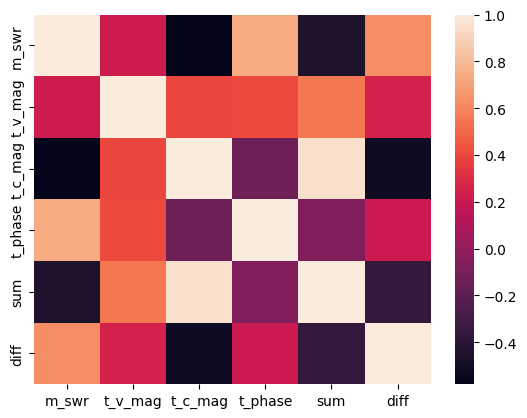

In [57]:
sns.heatmap(df.corr(method='spearman'))

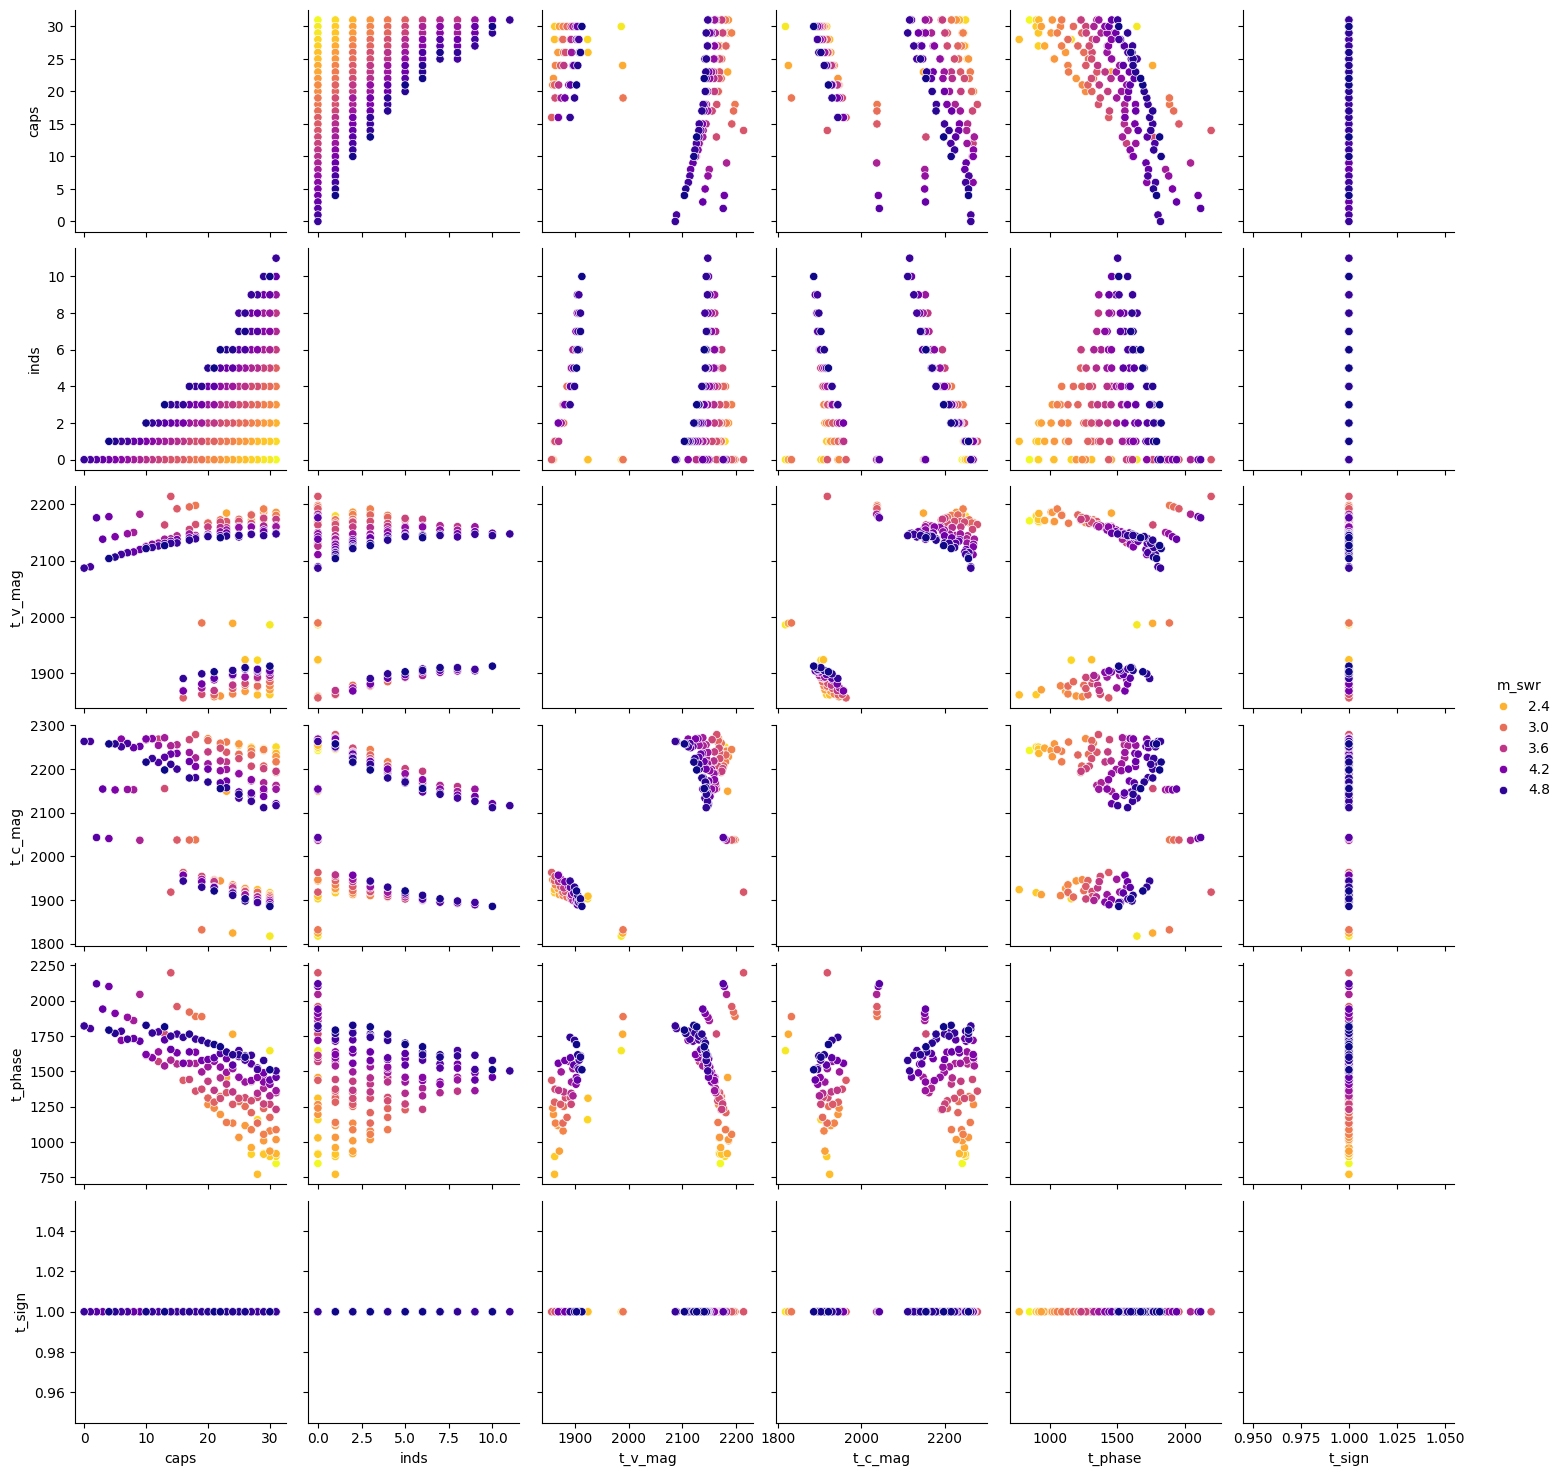

In [9]:
df = load_file('ant3_10mhz.jsonl')
sns.pairplot(df, hue='m_swr', palette='plasma_r')
